# Kaggle Titanic ML Challenge
The goal of this project is to accuratly predict the survival of passengers.

In [51]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [47]:
df_train = pd.read_csv('path/to/your/dataset')
df_train.head()
y = df_train['Survived']
x = df_train.drop(['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


### Explorative Data Analysis

<Axes: xlabel='Age'>

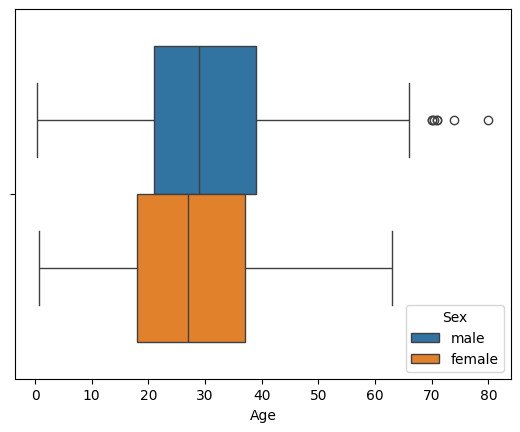

In [17]:
sns.boxplot(x=df_train['Age'], hue=df_train['Sex'])

<Axes: xlabel='Pclass', ylabel='Density'>

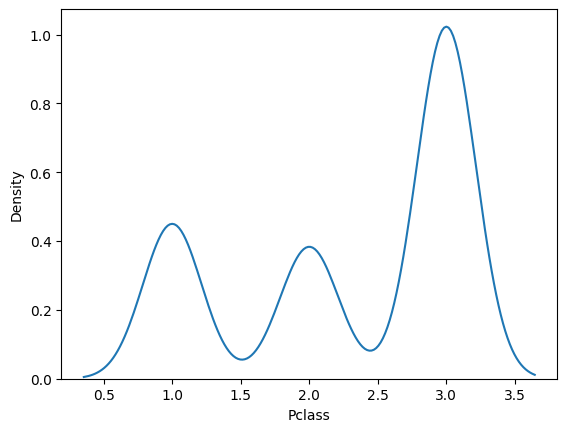

In [25]:
sns.kdeplot(df_train['Pclass'])

<Axes: xlabel='Pclass', ylabel='Age'>

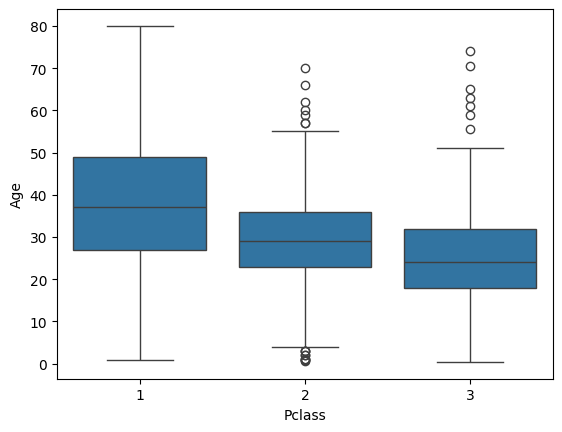

In [38]:
sns.boxplot(x='Pclass', y='Age', data=df_train)

No Passengers from Pclass 3 survived -> important feature

<Axes: xlabel='Survived', ylabel='Count'>

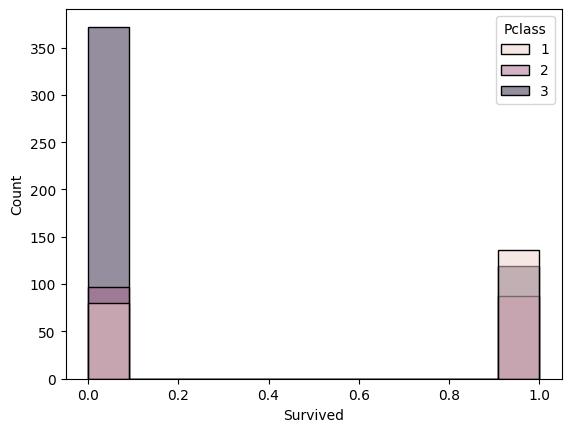

In [45]:
sns.histplot(x=y, hue=x['Pclass'])

Age needs to be imputed. I choose most_frequent for this, based on the age distribution

<Axes: >

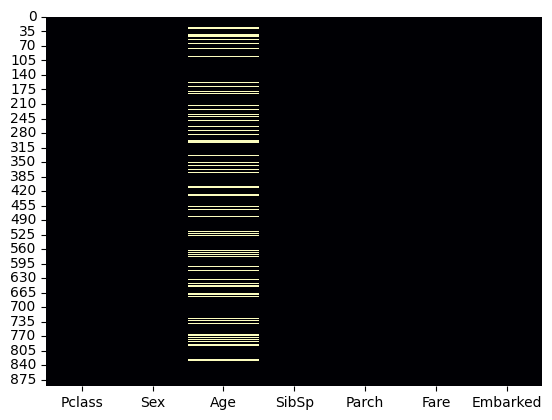

In [49]:
sns.heatmap(x.isna(),cmap = 'magma',cbar = False)

### Logistic Regression with SequentialFeatureSelector

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

categorical_features = ['Pclass', 'Sex', 'Embarked']
numerical_features = ['Age', 'Fare', 'SibSp', 'Parch']

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])

clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

model = LogisticRegression(max_iter=10000, class_weight='balanced')
full_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', model)
])

x_train_transformed = preprocessor.fit_transform(x_train)
x_val_transformed = preprocessor.transform(x_val)

best_score = 0
best_features = []

model = LogisticRegression(max_iter=10000, class_weight='balanced')

best_score = 0
best_features_indices = None

for i in range(1, x_train_transformed.shape[1]):
    sfs = SequentialFeatureSelector(
        model,
        n_features_to_select=i,
        direction='forward',
        scoring='accuracy',
        n_jobs=-1
    )
    sfs.fit(x_train_transformed, y_train)
    
    selected_mask = sfs.get_support()
    
    x_train_selected = x_train_transformed[:, selected_mask]
    x_val_selected = x_val_transformed[:, selected_mask]
    
    model.fit(x_train_selected, y_train)
    
    y_pred = model.predict(x_val_selected)
    
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    
    print(f"\nNumber of Features: {i}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    
    if accuracy > best_score:
        best_score = accuracy
        best_features_indices = selected_mask

print(f"\nBest model uses {best_features_indices.sum()} features with accuracy: {best_score:.4f}")


Number of Features: 1
Accuracy: 0.7821
Precision: 0.7536
Recall: 0.7027
F1 Score: 0.7273

Number of Features: 2
Accuracy: 0.7821
Precision: 0.7536
Recall: 0.7027
F1 Score: 0.7273

Number of Features: 3
Accuracy: 0.7821
Precision: 0.7536
Recall: 0.7027
F1 Score: 0.7273

Number of Features: 4
Accuracy: 0.7821
Precision: 0.7536
Recall: 0.7027
F1 Score: 0.7273

Number of Features: 5
Accuracy: 0.7821
Precision: 0.7536
Recall: 0.7027
F1 Score: 0.7273

Number of Features: 6
Accuracy: 0.7821
Precision: 0.7536
Recall: 0.7027
F1 Score: 0.7273

Number of Features: 7
Accuracy: 0.7709
Precision: 0.7324
Recall: 0.7027
F1 Score: 0.7172

Number of Features: 8
Accuracy: 0.7821
Precision: 0.7397
Recall: 0.7297
F1 Score: 0.7347

Number of Features: 9
Accuracy: 0.7933
Precision: 0.7342
Recall: 0.7838
F1 Score: 0.7582

Number of Features: 10
Accuracy: 0.8156
Precision: 0.7531
Recall: 0.8243
F1 Score: 0.7871

Number of Features: 11
Accuracy: 0.8045
Precision: 0.7468
Recall: 0.7973
F1 Score: 0.7712

Best mo

In [63]:
x_train_selected = x_train_transformed[:, best_features_indices]
x_val_selected = x_val_transformed[:, best_features_indices]

model = LogisticRegression(max_iter=10000, class_weight='balanced')
model.fit(x_train_selected, y_train)

y_val_pred = model.predict(x_val_selected)
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Accuracy on validation set: {accuracy:.4f}")

Accuracy on validation set: 0.8156


In [66]:
test_df = pd.read_csv('path/to/your/dataset')

x_test_transformed = preprocessor.transform(test_df)
x_test_selected = x_test_transformed[:, best_features_indices]

test_predictions = model.predict(x_test_selected)
test_probabilities = model.predict_proba(x_test_selected)[:, 1]

df_predictions = pd.DataFrame()
df_predictions['PassengerId'] = test_df['PassengerId'] 
df_predictions['Survived'] = test_predictions

df_predictions.to_csv('LR_SequentialFSelector_Titanic.csv', index=False)
